In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import geopandas as gpd

## Construct a GeoDataFrame from a DataFrame
- In this exercise, you will construct a geopandas GeoDataFrame from the Nashville Public Art DataFrame. You will need to import the Point constructor from the shapely.geometry module to create a geometry column in art before you can create a GeoDataFrame from art. This will get you ready to spatially join the art data and the neighborhoods data in order to discover which neighborhood has the most art.

- The Nashville Public Art data has been loaded for you as art.

In [2]:
art = pd.read_csv('data/public_art.csv')
art.head()

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817,"(36.1579, -86.78817)"
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)"
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)"


In [3]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
Title              132 non-null object
Last Name          132 non-null object
First Name         122 non-null object
Location           131 non-null object
Medium             128 non-null object
Type               132 non-null object
Description        87 non-null object
Latitude           132 non-null float64
Longitude          132 non-null float64
Mapped Location    132 non-null object
dtypes: float64(2), object(8)
memory usage: 10.4+ KB


In [4]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [5]:
# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

art_crs = {'init':'epsg:4326'}  
# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = art_crs, geometry = art.geometry)
type(art_geo)

geopandas.geodataframe.GeoDataFrame

In [7]:
art_geo.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774000000001 36.16234)


## Spatial join practice
- Is there a difference between art (point data) that intersects with neighborhoods (polygon data) and art (point data) within neighborhoods (polygon data)? Explore different spatial joins with the art_geo and neighborhoods GeoDataFrames, which are available in your workspace.

                   name                                           geometry
0  Historic Buena Vista  (POLYGON ((-86.79511056795417 36.1757596496334...
1        Charlotte Park  (POLYGON ((-86.87459668651866 36.1575770268129...
2              Hillwood  (POLYGON ((-86.87613708067906 36.1355409894979...
3            West Meade  (POLYGON ((-86.9038380396094 36.1255414807897,...
4          White Bridge  (POLYGON ((-86.86321427797685 36.1288622289404...


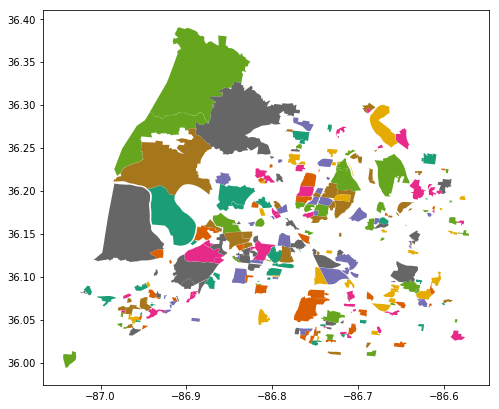

In [9]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file("data/neighborhoods.geojson.txt")

# Print the first few rows of neighborhoods
print(neighborhoods.head())

# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2', figsize = (8,8))

# Show the plot.
plt.show()

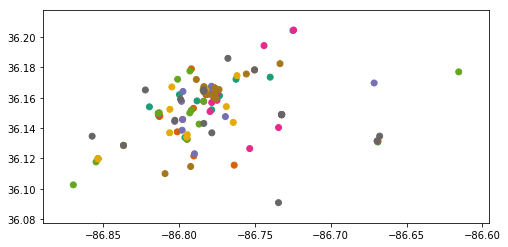

In [10]:
# Plot the neighborhoods, color according to name and use the Dark2 colormap
art_geo.plot(column = 'Title', cmap = 'Dark2', figsize = (8,8))

# Show the plot.
plt.show()

In [13]:
# Spatially join art_geo and neighborhoods
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

OSError: could not find or load spatialindex_c.dll

In [14]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods 
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

OSError: could not find or load spatialindex_c.dll

In [ ]:
# Spatially join art_geo and neighborhoods and using the contains op

art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

In [ ]:
# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the first few rows
print(neighborhood_art.head())

## Aggregating points within polygons
- Now that you have spatially joined art and neighborhoods, you can group, aggregate, and sort the data to find which neighborhood has the most public art. You can count artwork titles to see how many artworks are in each neighborhood.

In [ ]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'title', ascending = False))

## Plotting the Urban Residents neighborhood and art
- Now you know that most art is in the Urban Residents neighborhood. In this exercise, you'll create a plot of art in that neighborhood. First you will subset just the urban_art from neighborhood_art and you'll subset the urban_polygon from neighborhoods. Then you will create a plot of the polygon as ax before adding a plot of the art.

In [ ]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax  
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'type', legend = True);
plt.show()